In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf

In [408]:
A=pd.read_csv('kc_house_data.csv',index_col=0)
A.shape

(21613, 20)

In [409]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 3.5+ MB


In [410]:
A = A.reset_index()

In [411]:
A = A.drop(['id'],axis=1)

In [412]:
A = A.drop(['date'],axis=1)

In [413]:
from sklearn import preprocessing
A_sc=preprocessing.scale(A)
A_sc=pd.DataFrame(A_sc,columns=A.columns)#scaled full data frame

C:\Users\maneshwa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


C:\Users\maneshwa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


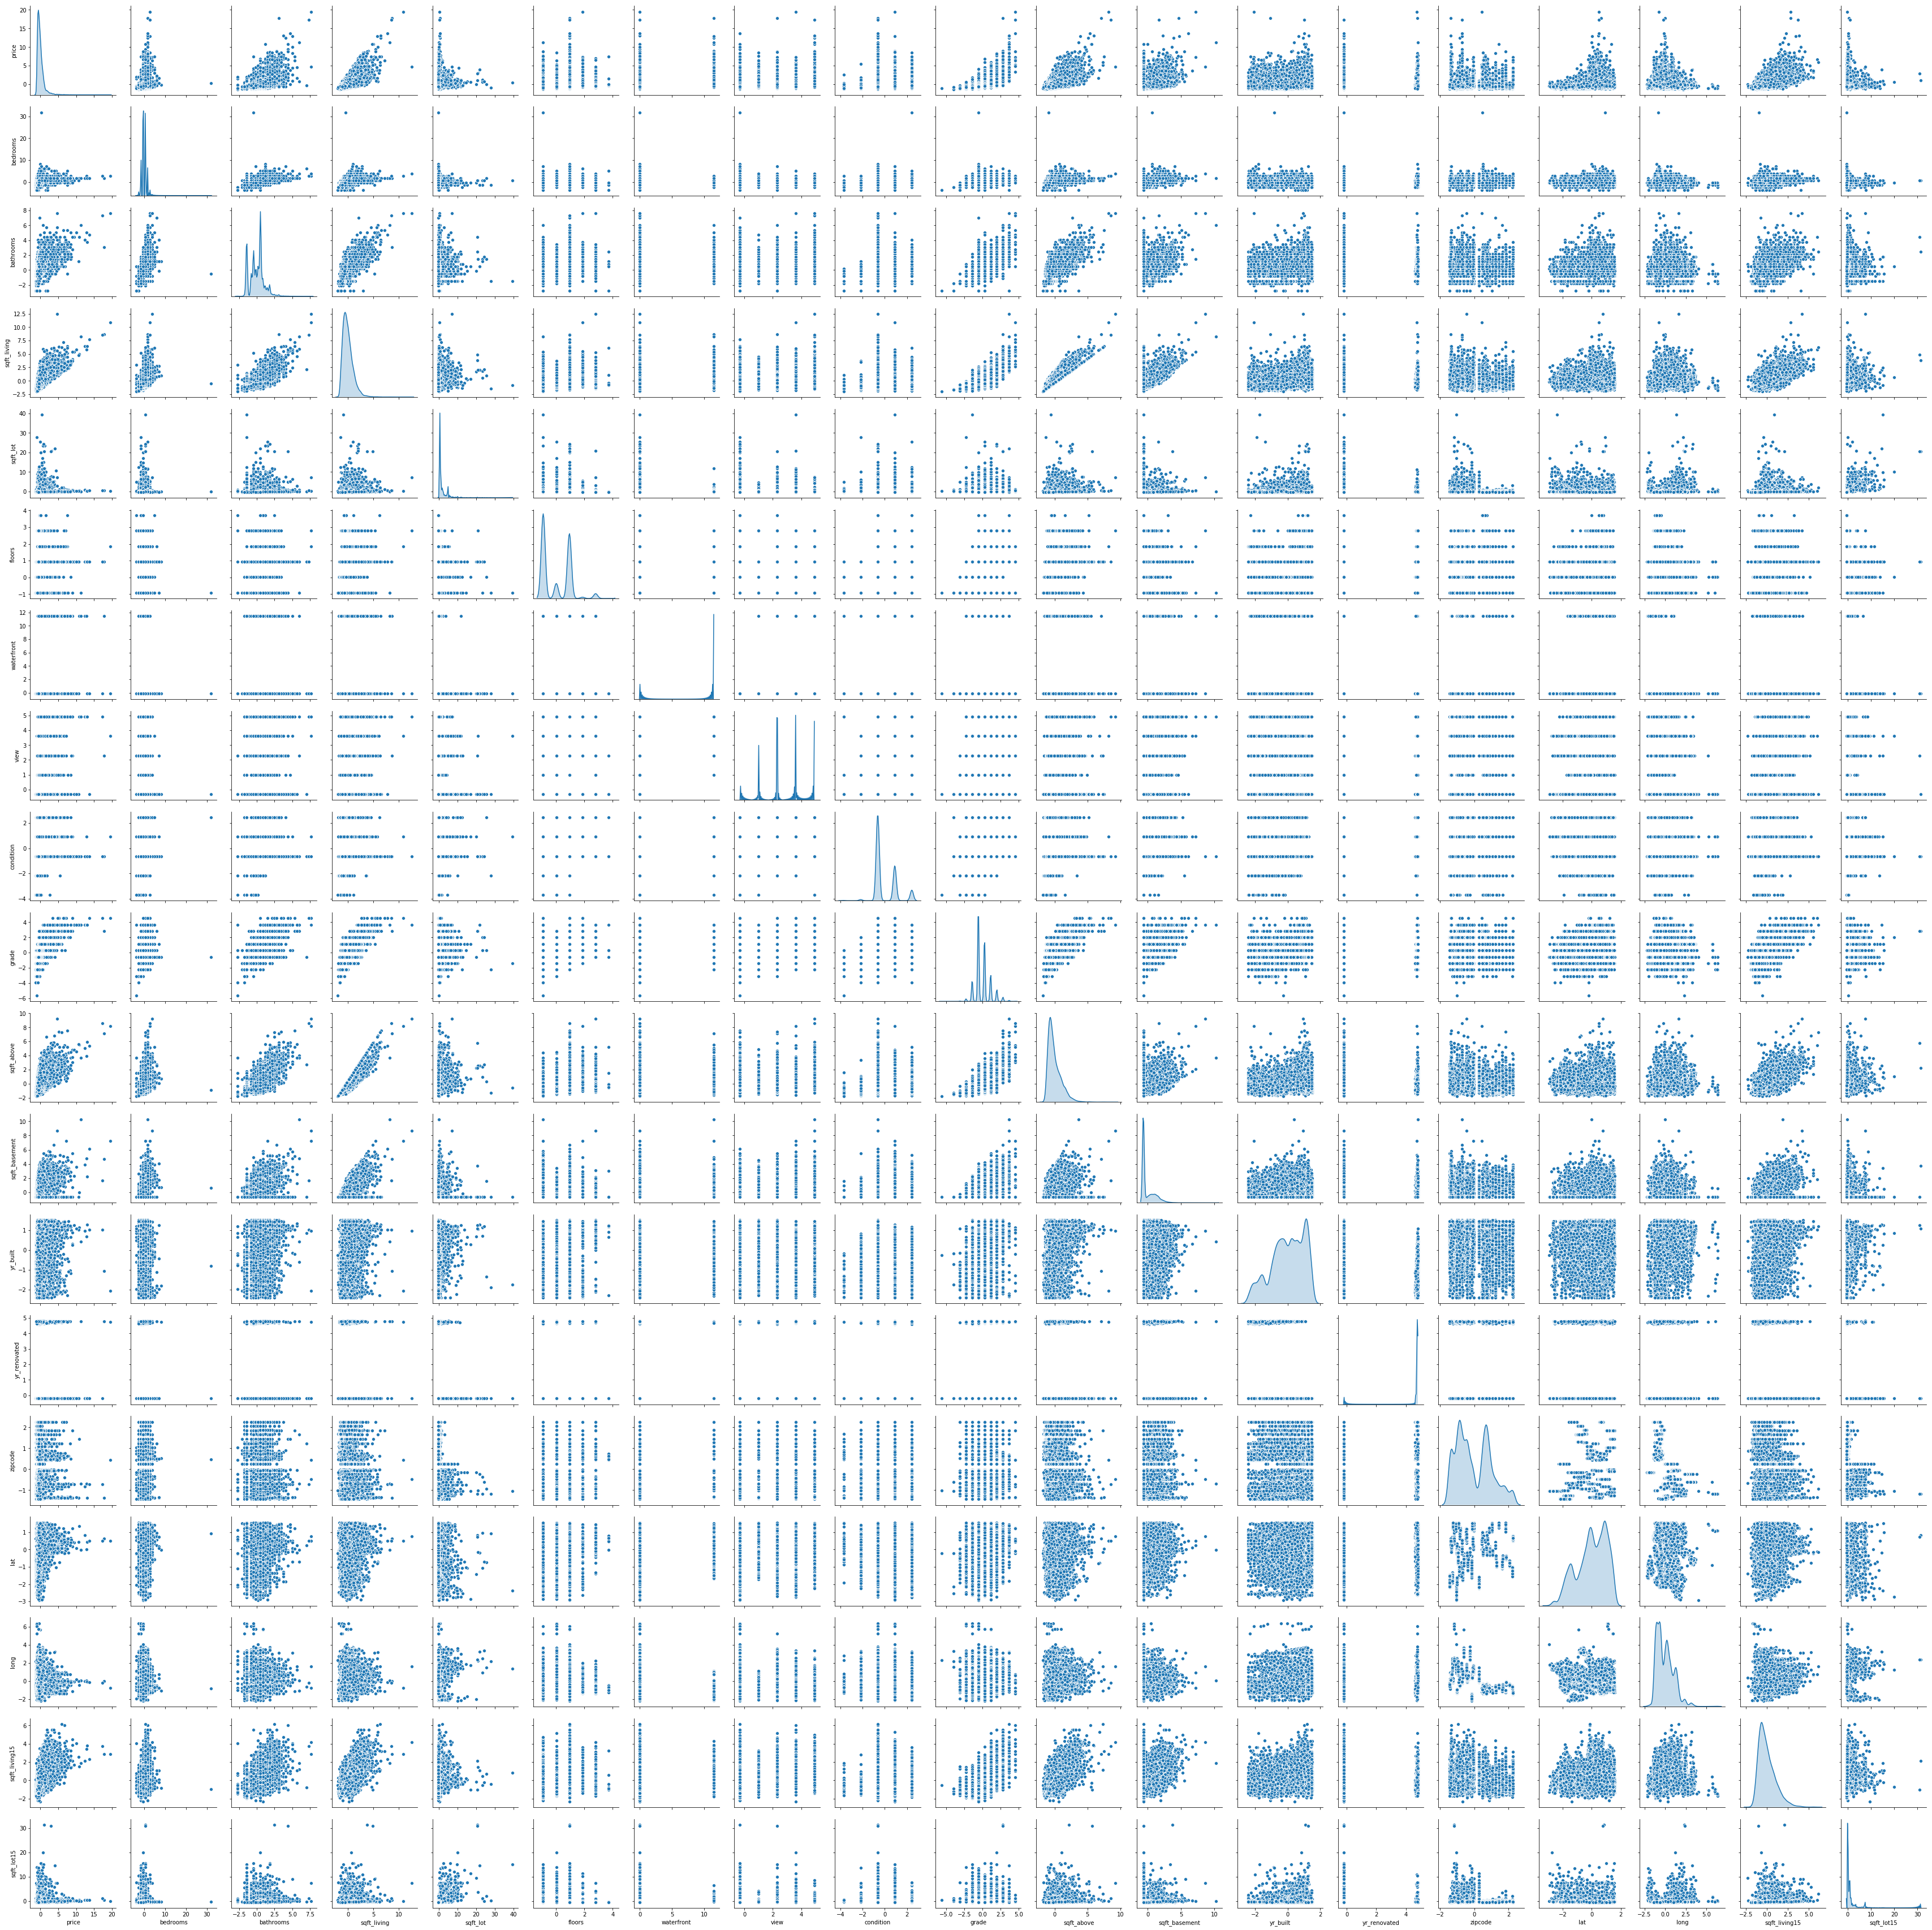

In [344]:
sns.pairplot(A_sc,diag_kind='kde')
#checking spread, peaks, feature interaction in the data.

In [414]:
#Multiple peaks, possible multiple co-linearity

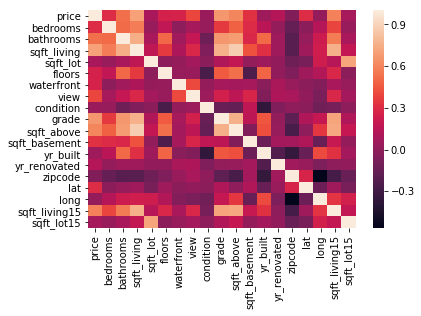

In [415]:
sns.heatmap(A_sc.corr(), xticklabels=A_sc.columns, yticklabels=A_sc.columns)

In [416]:
A_sc.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [417]:
# multiple features highly correlated to each other with a corelation co-efficient of above 0.7

In [418]:
A_sc.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [419]:
A_sc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849


In [432]:
m1=smf.ols('price~bedrooms+bathrooms+floors+yr_built+yr_renovated+zipcode',A_sc).fit()

In [433]:
m2=smf.ols('price~sqft_living+sqft_lot+waterfront+view+condition+grade+sqft_above+sqft_basement+lat+long+sqft_living15+sqft_lot15',A_sc).fit()

In [434]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     1880.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:21:35   Log-Likelihood:                -26127.
No. Observations:               21613   AIC:                         5.227e+04
Df Residuals:                   21606   BIC:                         5.232e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.684e-15      0.006  -3.05e-13      1.000      -0.011       0.011
bedrooms         0.0144      0.007      2.198      0.028       0.002       0.027
bathrooms        0.6218      0.008     77.850      0.000       0.606       0.637
floors           0.0944      0.007     13.831      0.000       0.081       0.108
yr_built        -0.3134      0.008    -41.675      0.000      -0.328      -0.299
yr_renovated     0.0254      0.006      4.382      0.000       0.014       0.037
zipcode         -0.0290      0.006     -4.846      0.000      -0.041      -0.017
==============================================================================
Omnibus:                    16999.359   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882748.950
Skew:                           3.361   Prob(JB):                         0.00
Kurtosis:                      33.579   Cond. No.                         2.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [435]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     3996.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:21:42   Log-Likelihood:                -18671.
No. Observations:               21613   AIC:                         3.737e+04
Df Residuals:                   21601   BIC:                         3.746e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.545e-15      0.004   1.16e-12      1.000      -0.008       0.008
sqft_living       0.2181      0.004     59.865      0.000       0.211       0.225
sqft_lot          0.0262      0.006      4.631      0.000       0.015       0.037
waterfront        0.1434      0.004     33.552      0.000       0.135       0.152
view              0.1275      0.005     27.637      0.000       0.119       0.137
condition         0.0944      0.004     23.369      0.000       0.087       0.102
grade             0.2577      0.007     38.413      0.000       0.245       0.271
sqft_above        0.1991      0.004     48.178      0.000       0.191       0.207
sqft_basement     0.0799      0.004     21.071      0.000       0.072       0.087
lat               0.2441      0.004     60.681      0.000       0.236       0.252
long             -0.0985      0.004    -21.948      0.000      -0.107      -0.090
sqft_living15     0.0573      0.007      8.651      0.000       0.044       0.070
sqft_lot15       -0.0248      0.006     -4.349      0.000      -0.036      -0.014
==============================================================================
Omnibus:                    18760.862   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1921931.769
Skew:                           3.689   Prob(JB):                         0.00
Kurtosis:                      48.604   Cond. No.                     2.57e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [436]:
A_sc.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849


In [437]:
X=A_sc.drop(['price'],axis=1)
Y=A_sc[['price']]

In [438]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [439]:
#1 Fit Regression and check score

In [440]:
model1=LinearRegression()
model1.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [441]:
model1.score(Xtest,ytest)

0.690479468932343

In [491]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [498]:
alphas = 10**np.linspace(10,-2,100)*0.5

Text(0, 0.5, 'weights')

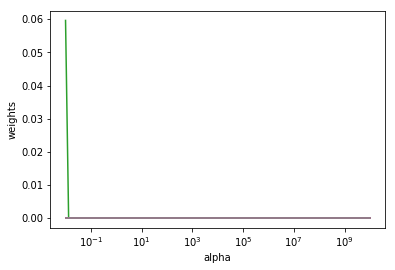

In [501]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xtrain, ytrain)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [502]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(Xtrain, ytrain)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(Xtrain, ytrain)
mean_squared_error(ytest, lasso.predict(Xtest))

C:\Users\maneshwa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3586781526599412

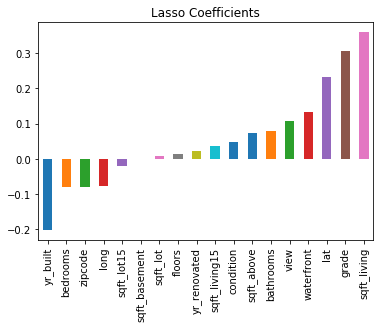

In [503]:
lasso_beta=pd.Series(lasso.coef_,variables).sort_values()
lasso_beta.plot(kind='bar',title='Lasso Coefficients')

In [504]:
# dropping less significant variables

In [540]:
Xs = X[['yr_built','lat','grade','sqft_living']]
Ys=A_sc[['price']]

In [541]:
from sklearn.preprocessing import PolynomialFeatures

In [542]:
qr=PolynomialFeatures(degree=2)
x_qr=qr.fit_transform(Xs)

In [543]:
x_qr_df=pd.DataFrame(x_qr)
x_qr_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,-0.544898,-0.352572,-0.558836,-0.979835,0.296914,0.192116,0.304508,0.533910,0.124307,0.197030,0.345462,0.312297,0.547567,0.960077
1,1.0,-0.681079,1.161568,-0.558836,0.533634,0.463868,-0.791119,0.380611,-0.363447,1.349241,-0.649126,0.619853,0.312297,-0.298214,0.284766
2,1.0,-1.293892,1.283537,-1.409587,-1.426254,1.674156,-1.660757,1.823853,1.845418,1.647466,-1.809257,-1.830649,1.986936,2.010429,2.034201
3,1.0,-0.204446,-0.283288,-0.558836,-0.130550,0.041798,0.057917,0.114252,0.026690,0.080252,0.158311,0.036983,0.312297,0.072956,0.017043
4,1.0,0.544548,0.409550,0.291916,-0.435422,0.296533,0.223020,0.158962,-0.237108,0.167731,0.119554,-0.178327,0.085215,-0.127106,0.189592


In [544]:
x_qr_df=x_qr_df.drop(0,axis=1)

In [545]:
x_qr_df.shape

(21613, 14)

In [546]:
x_qr_df=pd.concat([x_qr_df,Ys],axis=1)

In [547]:
x_qr_df.shape

(21613, 15)

In [548]:
x_qr_df.columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','price']

In [549]:
m3=smf.ols('price~f1+f2+f3+f4+f5+f6+f7+f8+f9+f10+f11+f12+f13+f14',x_qr_df).fit()

In [550]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     3996.
Date:                Sun, 14 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:27:45   Log-Likelihood:                -16854.
No. Observations:               21613   AIC:                         3.374e+04
Df Residuals:                   21598   BIC:                         3.386e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0520      0.007     -7.547      0.000      -0.066      -0.038
f1            -0.1490      0.005    -31.651      0.000      -0.158      -0.140
f2             0.1914      0.004     45.603      0.000       0.183       0.200
f3             0.3256      0.006     51.053      0.000       0.313       0.338
f4             0.3265      0.006     51.820      0.000       0.314       0.339
f5             0.0572      0.004     15.154      0.000       0.050       0.065
f6            -0.0484      0.005     -9.173      0.000      -0.059      -0.038
f7            -0.0761      0.007    -10.968      0.000      -0.090      -0.062
f8            -0.0848      0.006    -14.414      0.000      -0.096      -0.073
f9            -0.0960      0.004    -27.013      0.000      -0.103      -0.089
f10            0.0679      0.007      9.814      0.000       0.054       0.081
f11            0.0482      0.006      7.544      0.000       0.036       0.061
f12            0.0029      0.006      0.478      0.633      -0.009       0.015
f13            0.1720      0.009     18.558      0.000       0.154       0.190
f14            0.0002      0.004      0.062      0.951      -0.007       0.008
==============================================================================
Omnibus:                    13558.273   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           612685.685
Skew:                           2.395   Prob(JB):                         0.00
Kurtosis:                      28.640   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [552]:
x=x_qr_df.drop(['price'],axis=1)
ytrain1 = x_qr_df[['price']]

In [553]:
X_train,X_test,y_train,y_test=train_test_split(x,ytrain1,test_size=0.3,random_state=1)

In [554]:
pr=LinearRegression()
pr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [555]:
pr_predict=pr.predict(X_test)

In [556]:
pr_rmse=np.sqrt(np.mean((y_test-pr_predict)**2))
pr_rmse

price    0.56354
dtype: float64

In [557]:
pr.score(X_test,y_test)

0.7257529728570384

In [567]:
from sklearn.model_selection import KFold

In [572]:
kf=KFold(n_splits=3,shuffle=True,random_state=2)
for model, name in zip([pr],['MVLR']):
    rmse=[]
    for train,test in kf.split(Xs,Ys):
        Xtrain,Xtest=Xs.iloc[train,:],Xs.iloc[test,:]
        Ytrain,Ytest=Ys.iloc[train],Ys.iloc[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        rmse.append(np.sqrt(metrics.mean_squared_error(Ytest,Y_predict)))
    print(rmse)
    print("Cross_Validated_rmse_score: %0.03f (+/- %0.5f) [%s]" % (np.mean(rmse),np.var(rmse,ddof=1),name)) 

[0.6061252234402776, 0.5979594324851779, 0.5946394236356178]
Cross_Validated_rmse_score: 0.600 (+/- 0.00003) [MVLR]
